# Introduction

Dans ce notebook, on tente de répondre à la question suivante : 
- le cluster de Colméry a-t'il disparu ou est-il en déplétion ? 
- Que se passe-t'il au juste ? 

Ce notebook peut aussi servir pour vérifier d'autres clusters. Il suffit d'adapter le numéro de département et l'année à partir de laquelle on veut filtrer le dataset si besoin.

# Importation et préparation des données 

In [1]:
import pandas as pd

In [2]:
verif=pd.read_csv("./spipoll.csv")

C:\Users\guilts0300\AppData\Local\Temp\ipykernel_19740\455622385.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  verif=pd.read_csv("./spipoll.csv")


In [3]:
# Séparation de la colonne 'coordonnées' en deux colonnes 'longitude' et 'latitude'
verif[['longitude', 'latitude']] = verif['coordonnees_GPS'].str.split(',', expand=True).astype(float)

# Conversion en datetime
verif['collection_date'] = pd.to_datetime(verif['collection_date'])

# Extraire l'année à partir de la colonne 'date_observation'
verif['annee_collection'] = verif['collection_date'].dt.year

# Convertir les codes postaux en chaînes de caractères (str)
verif['code_postal'] = verif['code_postal'].astype(str)

# Utiliser une expression régulière pour extraire les deux premiers chiffres (numéro de département)
verif['departement'] = verif['code_postal'].str.extract(r'^(\d{2})')

In [4]:
unused_columns_verif = ['collection_nom', 'collection_id', 'protocole_long',
       'photo_fleur', 'photo_plante', 'photo_feuille',               
       'plante_caractere', 'plante_inconnue',
       'photo_fleur', 'photo_plante', 'photo_feuille',
       'fleur_ombre', 
       'insecte_abondance', 'insecte_commentaire', 'insecte_vu_sur_fleur',
        'grande_culture', 'habitat',
        'plante_famille', 'plante_genre', 'plante_espece', 'plante_sc',
       'plante_fr', 'plante_precision', 'collection_date',
       'collection_heure_debut', 'nebulosite', 'temperature', 'vent',   
        'coordonnees_GPS', 'code_postal',
       'nb_validation', 'nb_suggestion', 
        'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref']

In [5]:
verif.drop(columns=unused_columns_verif, inplace=True)

# Filtrage du dataset - Colméry (57)

In [6]:
verif.columns

Index(['user_id', 'insecte_ordre', 'insecte_super_famille', 'insecte_famille',
       'insecte_sous_famille', 'insecte_genre', 'insecte_espece', 'insecte_sc',
       'insecte_fr', 'longitude', 'latitude', 'annee_collection',
       'departement'],
      dtype='object')

In [7]:
latest_year = 2014
departement = 57
insectes = ['Apidae', 'Syrphidae']

In [8]:
colmery = verif.where((verif['departement']=='57')).dropna(subset='departement')

In [9]:
colmery['insecte_famille'].value_counts()

Apidae           565
Syrphidae        480
Halictidae       223
Nymphalidae      139
Tachinidae       106
                ... 
Apionidae          1
Philodromidae      1
Asilidae           1
Scutelleridae      1
Pyrochroidae       1
Name: insecte_famille, Length: 95, dtype: int64

Dans le 57, les insectes majoritaires observés sont bien ceux appartenant aux deux familles des Apidae et Syrphidae. Le cluster d'Apidae et Syrphidae ne semble donc pas avoir diminué/disparu au profit d'une autre famille d'insectes qui aurait alors formé un autre cluster différent d'un cluster d'Apidae ou de Syrphidae.

In [10]:
# On filtre à partir de ces deux familles d'insectes
colmery2 = verif.where((verif['departement']=='57')  & (verif['insecte_famille'].isin(insectes))).dropna(subset=['departement', 'insecte_famille'])

In [11]:
colmery2.head()

,user_id,insecte_ordre,insecte_super_famille,insecte_famille,insecte_sous_famille,insecte_genre,insecte_espece,insecte_sc,insecte_fr,longitude,latitude,annee_collection,departement
35283,11 568,Hymenoptera,Apoidea,Apidae,Apinae,Bombus,NaN,Bombus,Les Bourdons jaune et noir,48.965419,6.290049,2019.0,57
35333,13 061,Diptera,Syrphoidea,Syrphidae,Syrphinae,Sphaerophoria,Sphaerophoria scripta,Sphaerophoria scripta,Le Syrphe porte-plume (mâle),49.066637,7.115099,2019.0,57
35341,13 061,Diptera,Syrphoidea,Syrphidae,Eristalinae,Eristalis,NaN,Eristalis,Les Eristales (autres),49.066637,7.115099,2019.0,57
35348,13 061,Diptera,Syrphoidea,Syrphidae,Eristalinae,Eristalis,NaN,Eristalis,Les Eristales (autres),49.066637,7.115099,2019.0,57
35351,13 061,Hymenoptera,Apoidea,Apidae,Apinae,Apis,Apis mellifera,Apis mellifera,L'Abeille mellifère,49.066637,7.115099,2019.0,57


<Figure size 1000x600 with 0 Axes>

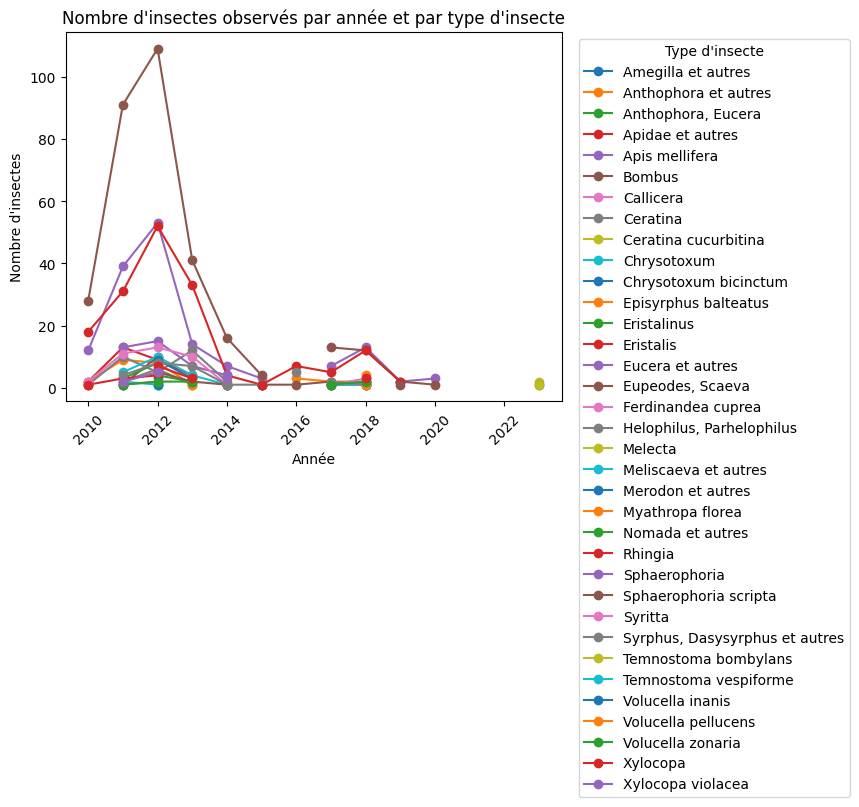

In [13]:
import matplotlib.pyplot as plt

# Filtrer le DataFrame pour n'inclure que les observations d'insectes
#df_insectes = df[df['insectes'] == True]

# Grouper le DataFrame filtré par année et type d'insecte, et compter le nombre d'observations pour chaque groupe
observations_par_annee_insecte = colmery2.groupby(['annee_collection', 'insecte_sc']).size()

# Réorganiser les données pour les tracer
observations_par_annee_insecte = observations_par_annee_insecte.unstack(level='insecte_sc')

# Tracer les courbes pour chaque type d'insecte
plt.figure(figsize=(10, 6))
observations_par_annee_insecte.plot(kind='line', marker='o')
plt.title('Nombre d\'insectes observés par année et par type d\'insecte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'insectes')
plt.xticks(rotation=45)
# Placer la légende en dehors du graphique
plt.legend(title='Type d\'insecte', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


In [14]:
observations_par_annee_insecte

insecte_sc,Amegilla et autres,Anthophora et autres,"Anthophora, Eucera",Apidae et autres,Apis mellifera,Bombus,Callicera,Ceratina,Ceratina cucurbitina,Chrysotoxum,...,Sphaerophoria scripta,Syritta,"Syrphus, Dasysyrphus et autres",Temnostoma bombylans,Temnostoma vespiforme,Volucella inanis,Volucella pellucens,Volucella zonaria,Xylocopa,Xylocopa violacea
annee_collection,,,,,,,,,,,,,,,,,,,,,
2010.0,NaN,NaN,NaN,2.0,12.0,28.0,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2011.0,NaN,NaN,1.0,13.0,39.0,91.0,NaN,2.0,NaN,2.0,...,NaN,11.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0
2012.0,3.0,2.0,NaN,9.0,53.0,109.0,NaN,6.0,NaN,1.0,...,5.0,13.0,8.0,NaN,1.0,1.0,NaN,2.0,7.0,5.0
2013.0,NaN,NaN,NaN,4.0,14.0,41.0,NaN,1.0,NaN,NaN,...,2.0,10.0,7.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN
2014.0,1.0,1.0,1.0,NaN,7.0,16.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2015.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017.0,NaN,NaN,NaN,1.0,7.0,13.0,NaN,NaN,NaN,1.0,...,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2018.0,NaN,NaN,NaN,1.0,13.0,12.0,1.0,3.0,1.0,1.0,...,NaN,3.0,1.0,NaN,NaN,2.0,1.0,2.0,3.0,NaN


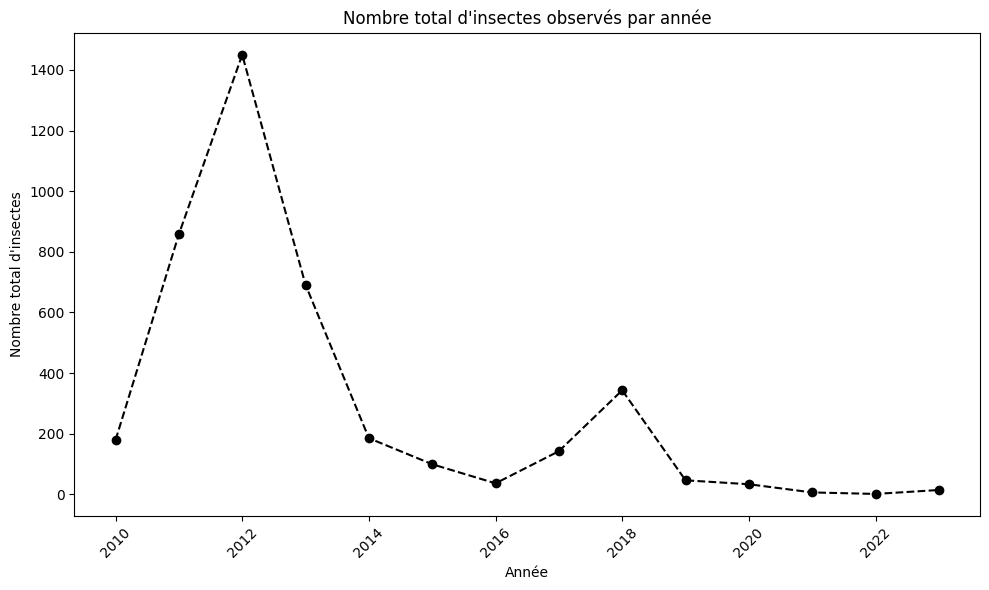

In [21]:
# Créer un second graphique pour le nombre total d'observations par année
plt.figure(figsize=(10, 6))
observations_totales_par_annee = colmery.groupby('annee_collection').size()
observations_totales_par_annee.plot(kind='line', marker='o', color='black', linestyle='--')
plt.title('Nombre total d\'insectes observés par année')
plt.xlabel('Année')
plt.ylabel('Nombre total d\'insectes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


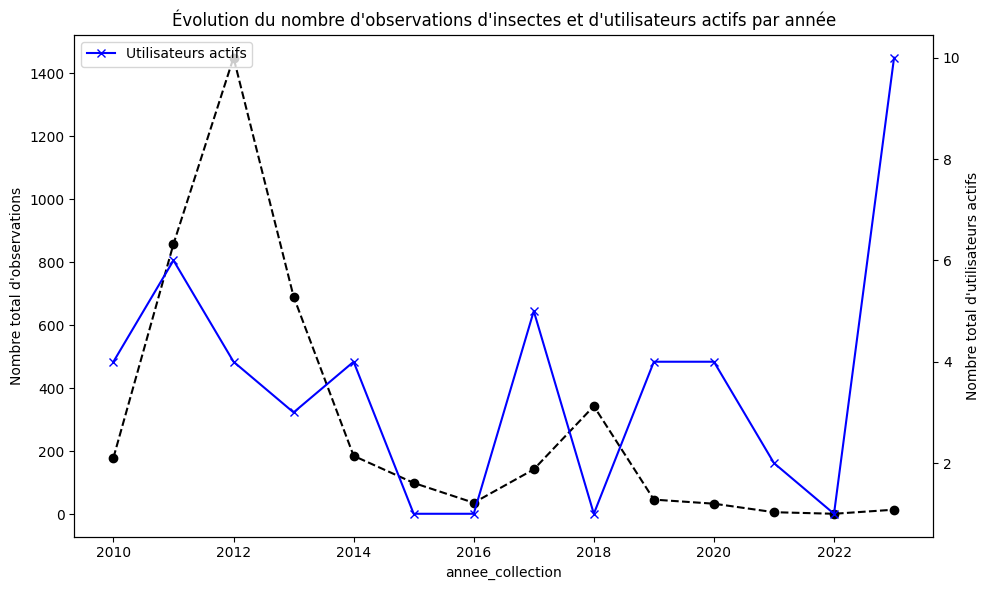

In [24]:
import matplotlib.pyplot as plt

# Calculer le nombre total d'observations d'insectes par année
observations_totales_par_annee = colmery.groupby('annee_collection').size()

# Calculer le nombre total d'utilisateurs actifs par année
utilisateurs_actifs_par_annee = colmery.groupby('annee_collection')['user_id'].nunique()

# Créer le graphique
plt.figure(figsize=(10, 6))

# Tracer le nombre total d'observations d'insectes par année sur le premier axe y
observations_totales_par_annee.plot(kind='line', marker='o', color='black', linestyle='--', label='Observations d\'insectes')
plt.ylabel('Nombre total d\'observations')

# Créer un deuxième axe y pour le nombre total d'utilisateurs actifs
plt.twinx()
utilisateurs_actifs_par_annee.plot(kind='line', marker='x', color='blue', linestyle='-', label='Utilisateurs actifs')
plt.ylabel('Nombre total d\'utilisateurs actifs')

# Ajouter des titres et une légende
plt.title('Évolution du nombre d\'observations d\'insectes et d\'utilisateurs actifs par année')
plt.xlabel('Année')
plt.legend()

# Afficher le graphique
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
utilisateurs_actifs_par_annee

annee_collection
2010.0     4
2011.0     6
2012.0     4
2013.0     3
2014.0     4
2015.0     1
2016.0     1
2017.0     5
2018.0     1
2019.0     4
2020.0     4
2021.0     2
2022.0     1
2023.0    10
Name: user_id, dtype: int64

In [20]:
colmery2['user_id'].nunique()

21

On en conclut que le cluster de Colméry a surement 'disparu' de la carte car il y avait trop peu d'observations pour qu'il soit considéré comme un cluster, malgré l'indexation de min_samples sur le nb d'observations total toutes régions confondues.

N.B : pour 2014, min_samples = 166

# Filtrage du dataset - Rennes (35)

In [25]:
verif.columns

Index(['user_id', 'insecte_ordre', 'insecte_super_famille', 'insecte_famille',
       'insecte_sous_famille', 'insecte_genre', 'insecte_espece', 'insecte_sc',
       'insecte_fr', 'longitude', 'latitude', 'annee_collection',
       'departement'],
      dtype='object')

In [26]:
departement = str(35)
insectes = ['Apidae', 'Syrphidae']

In [44]:
rennes = verif.where((verif['departement']==departement) & (verif['annee_collection']>= 2011)).dropna(subset='departement')

In [45]:
rennes['insecte_sc'].value_counts()

Bombus                              5161
Halictus, Lasioglossum et autres    4493
Eristalis                           4349
Apis mellifera                      3127
Halictidae                          2635
                                    ... 
Spilostethus saxatilis                 1
Cerocoma                               1
Trichodes leucopsideus                 1
Hycleus, Mylabris                      1
Maculinea                              1
Name: insecte_sc, Length: 342, dtype: int64

En Ile-et-Vilaine, il y a plus d'observations d'Eristales que d'observations d'abeilles mellifères. Le bourdon prédomine. 

In [46]:
rennes['insecte_famille'].value_counts()

Syrphidae          11631
Apidae              9984
Halictidae          7611
Andrenidae          5074
Calliphoridae       2600
                   ...  
Ulidiidae              3
Scutelleridae          2
Platystomatidae        2
Therevidae             2
Cimbicidae             1
Name: insecte_famille, Length: 105, dtype: int64

Dans le 57, les insectes majoritaires observés sont bien ceux appartenant aux deux familles des Apidae et Syrphidae. 

In [51]:
# On filtre à partir de ces deux familles d'insectes
rennes2 = verif.where((rennes['departement']==departement)  & (rennes['insecte_famille'].isin(insectes))).dropna(subset=['departement', 'insecte_famille'])

In [52]:
rennes2.head()

,user_id,insecte_ordre,insecte_super_famille,insecte_famille,insecte_sous_famille,insecte_genre,insecte_espece,insecte_sc,insecte_fr,longitude,latitude,annee_collection,departement
26,11 576,Diptera,Syrphoidea,Syrphidae,Syrphinae,Episyrphus,Episyrphus balteatus,Episyrphus balteatus,Le Syrphe ceinturé,48.222914,-1.694208,2019.0,35
34,11 576,Hymenoptera,Apoidea,Apidae,Apinae,Bombus,NaN,Bombus,Les Bourdons noirs à bande(s) jaune(s) et cul ...,48.222914,-1.694208,2019.0,35
37,11 576,Hymenoptera,Apoidea,Apidae,Apinae,Bombus,NaN,Bombus,Les Bourdons noirs à bande(s) jaune(s) et cul ...,48.213297,-1.697611,2019.0,35
38,11 576,Hymenoptera,Apoidea,Apidae,Apinae,Bombus,NaN,Bombus,Les Bourdons noirs à bande(s) jaune(s) et cul ...,48.213131,-1.699539,2019.0,35
40,11 576,Hymenoptera,Apoidea,Apidae,Apinae,Bombus,NaN,Bombus,Les Bourdons noirs à bande(s) jaune(s) et cul ...,48.213483,-1.702578,2019.0,35


<Figure size 1000x600 with 0 Axes>

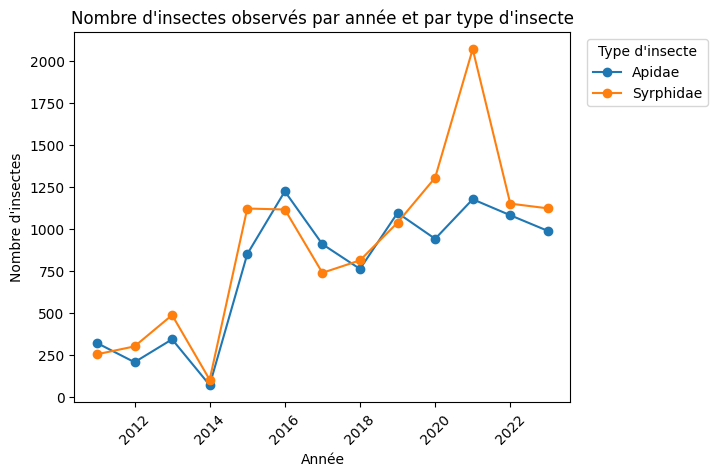

In [53]:
import matplotlib.pyplot as plt


# Grouper le DataFrame filtré par année et type d'insecte, et compter le nombre d'observations pour chaque groupe
observations_par_annee_insecte = rennes2.groupby(['annee_collection', 'insecte_famille']).size()

# Réorganiser les données pour les tracer
observations_par_annee_insecte = observations_par_annee_insecte.unstack(level='insecte_famille')

# Tracer les courbes pour chaque type d'insecte
plt.figure(figsize=(10, 6))
observations_par_annee_insecte.plot(kind='line', marker='o')
plt.title('Nombre d\'insectes observés par année et par type d\'insecte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'insectes')
plt.xticks(rotation=45)
# Placer la légende en dehors du graphique
plt.legend(title='Type d\'insecte', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

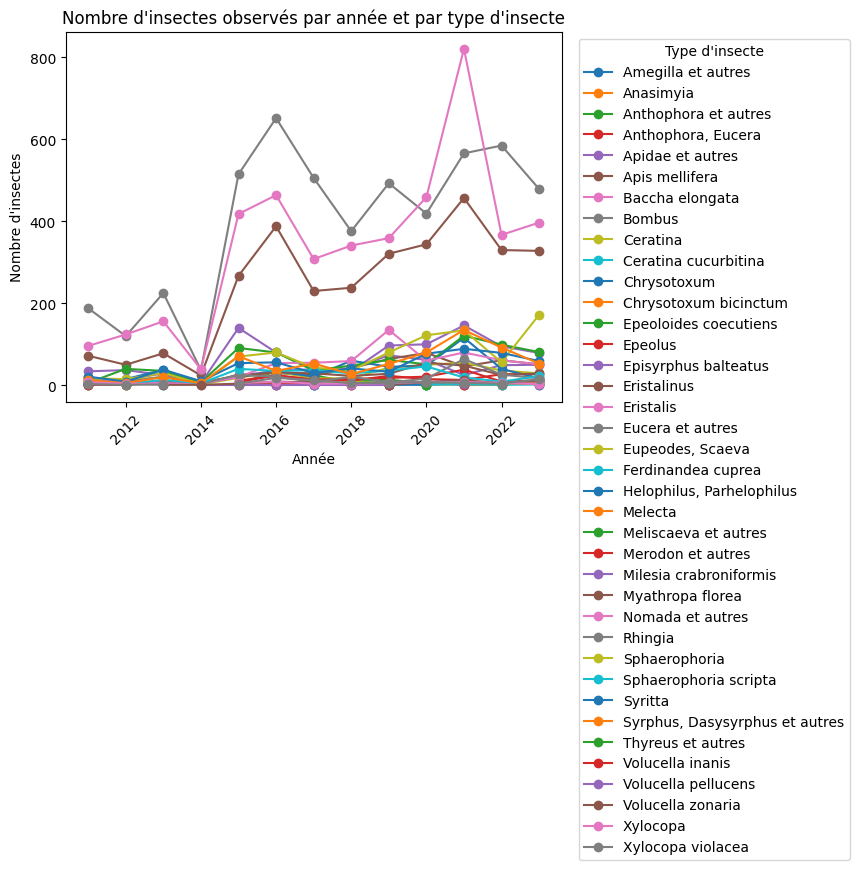

In [54]:
import matplotlib.pyplot as plt


# Grouper le DataFrame filtré par année et type d'insecte, et compter le nombre d'observations pour chaque groupe
observations_par_annee_insecte = rennes2.groupby(['annee_collection', 'insecte_sc']).size()

# Réorganiser les données pour les tracer
observations_par_annee_insecte = observations_par_annee_insecte.unstack(level='insecte_sc')

# Tracer les courbes pour chaque type d'insecte
plt.figure(figsize=(10, 6))
observations_par_annee_insecte.plot(kind='line', marker='o')
plt.title('Nombre d\'insectes observés par année et par type d\'insecte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'insectes')
plt.xticks(rotation=45)
# Placer la légende en dehors du graphique
plt.legend(title='Type d\'insecte', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


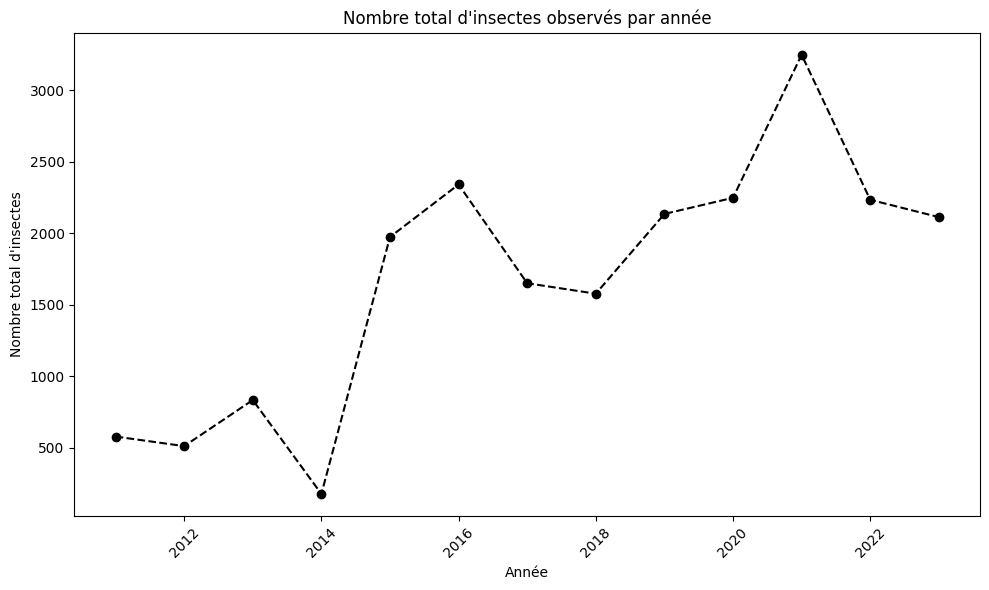

In [55]:
# Créer un second graphique pour le nombre total d'observations par année
plt.figure(figsize=(10, 6))
observations_totales_par_annee = rennes2.groupby('annee_collection').size()
observations_totales_par_annee.plot(kind='line', marker='o', color='black', linestyle='--')
plt.title('Nombre total d\'insectes observés par année')
plt.xlabel('Année')
plt.ylabel('Nombre total d\'insectes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


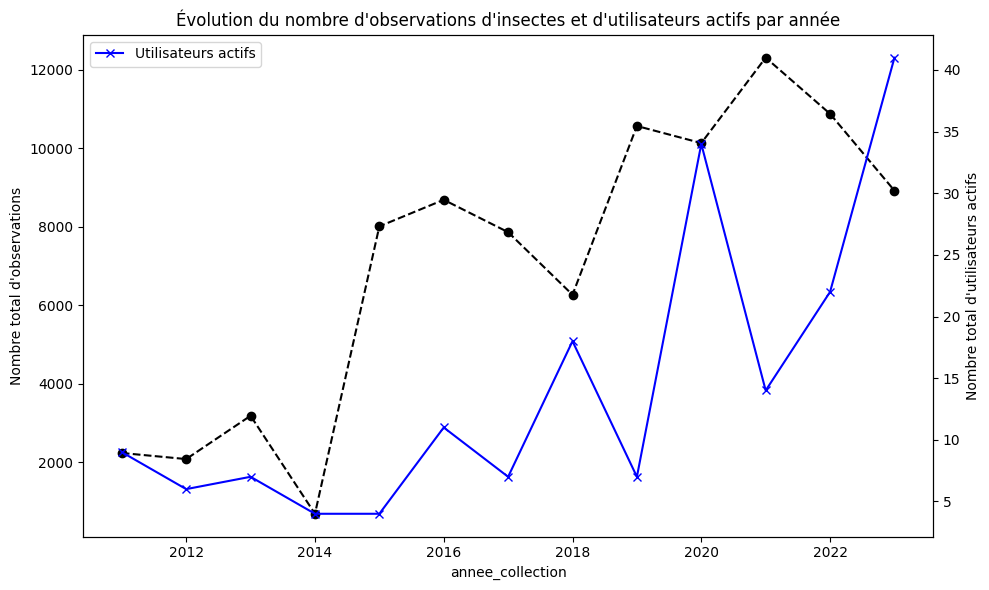

In [56]:
import matplotlib.pyplot as plt

# Calculer le nombre total d'observations d'insectes par année
observations_totales_par_annee = rennes.groupby('annee_collection').size()

# Calculer le nombre total d'utilisateurs actifs par année
utilisateurs_actifs_par_annee = rennes.groupby('annee_collection')['user_id'].nunique()

# Créer le graphique
plt.figure(figsize=(10, 6))

# Tracer le nombre total d'observations d'insectes par année sur le premier axe y
observations_totales_par_annee.plot(kind='line', marker='o', color='black', linestyle='--', label='Observations d\'insectes')
plt.ylabel('Nombre total d\'observations')

# Créer un deuxième axe y pour le nombre total d'utilisateurs actifs
plt.twinx()
utilisateurs_actifs_par_annee.plot(kind='line', marker='x', color='blue', linestyle='-', label='Utilisateurs actifs')
plt.ylabel('Nombre total d\'utilisateurs actifs')

# Ajouter des titres et une légende
plt.title('Évolution du nombre d\'observations d\'insectes et d\'utilisateurs actifs par année')
plt.xlabel('Année')
plt.legend()

# Afficher le graphique
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ce nombre d'observations nous invite à nous demander s'il n'y a pas plus d'observaitons en ile-et-vilaine que dans la Nièvre de manière générale. 


In [57]:
observations_totales_par_annee

annee_collection
2011.0     2233
2012.0     2078
2013.0     3182
2014.0      683
2015.0     8012
2016.0     8690
2017.0     7864
2018.0     6268
2019.0    10572
2020.0    10136
2021.0    12315
2022.0    10882
2023.0     8923
dtype: int64

# Filtrage du dataset - Drôme/Ardèche (26/7)

## Drôme 26

In [16]:
verif.columns

Index(['insecte_ordre', 'insecte_super_famille', 'insecte_famille',
       'insecte_sous_famille', 'insecte_genre', 'insecte_espece', 'insecte_sc',
       'insecte_fr', 'longitude', 'latitude', 'annee_collection',
       'departement'],
      dtype='object')

In [60]:
departement = str(26)
insectes = ['Apidae', 'Syrphidae']

In [61]:
drome = verif.where((verif['departement']==departement)).dropna(subset='departement')

In [62]:
drome['insecte_sc'].value_counts()

Apis mellifera                      154
Bombus                              129
Halictus, Lasioglossum et autres    102
Halictidae                           61
Eristalis                            59
                                   ... 
Isomira et autres                     1
Cerambyx scopolii                     1
Phalangiidae                          1
Anaglyptus mysticus                   1
Sesiidae                              1
Name: insecte_sc, Length: 290, dtype: int64

En Ile-et-Vilaine, il y a plus d'observations d'Eristales que d'observations d'abeilles mellifères. Le bourdon prédomine. 

In [63]:
drome['insecte_famille'].value_counts()

Apidae          358
Syrphidae       286
Halictidae      170
Nymphalidae     163
Tachinidae       83
               ... 
Asilidae          1
Phalangiidae      1
Lycidae           1
Lycosidae         1
Sesiidae          1
Name: insecte_famille, Length: 96, dtype: int64

Les insectes majoritaires observés sont bien ceux appartenant aux deux familles des Apidae et Syrphidae. 

In [64]:
# On filtre à partir de ces deux familles d'insectes
drome2 = verif.where((verif['departement']==departement)  & (verif['insecte_famille'].isin(insectes))).dropna(subset=['departement', 'insecte_famille'])

In [65]:
drome2.head()

,insecte_ordre,insecte_super_famille,insecte_famille,insecte_sous_famille,insecte_genre,insecte_espece,insecte_sc,insecte_fr,longitude,latitude,annee_collection,departement
7576,Hymenoptera,Apoidea,Apidae,Apinae,Apis,Apis mellifera,Apis mellifera,L'Abeille mellifère,44.419208,4.908356,2019.0,26
10201,Diptera,Syrphoidea,Syrphidae,Syrphinae,Sphaerophoria,NaN,Sphaerophoria,Les Syrphes Sphaerophoria (femelle),44.533019,4.736492,2019.0,26
10202,Diptera,Syrphoidea,Syrphidae,Syrphinae,Scaeva,NaN,"Eupeodes, Scaeva",Les Syrphes à taches en virgules,44.533019,4.736492,2019.0,26
10228,Hymenoptera,Apoidea,Apidae,Apinae,Apis,Apis mellifera,Apis mellifera,L'Abeille mellifère,44.533156,4.736164,2019.0,26
10244,Hymenoptera,Apoidea,Apidae,Apinae,Apis,Apis mellifera,Apis mellifera,L'Abeille mellifère,44.525767,4.744772,2019.0,26


<Figure size 1000x600 with 0 Axes>

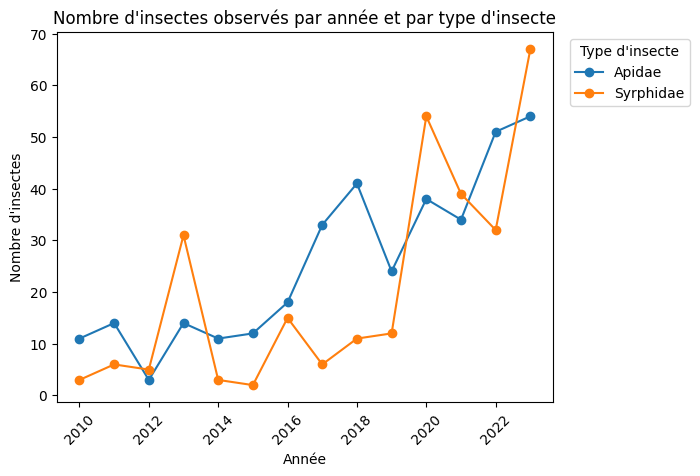

In [66]:
import matplotlib.pyplot as plt


# Grouper le DataFrame filtré par année et type d'insecte, et compter le nombre d'observations pour chaque groupe
observations_par_annee_insecte = drome2.groupby(['annee_collection', 'insecte_famille']).size()

# Réorganiser les données pour les tracer
observations_par_annee_insecte = observations_par_annee_insecte.unstack(level='insecte_famille')

# Tracer les courbes pour chaque type d'insecte
plt.figure(figsize=(10, 6))
observations_par_annee_insecte.plot(kind='line', marker='o')
plt.title('Nombre d\'insectes observés par année et par type d\'insecte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'insectes')
plt.xticks(rotation=45)
# Placer la légende en dehors du graphique
plt.legend(title='Type d\'insecte', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

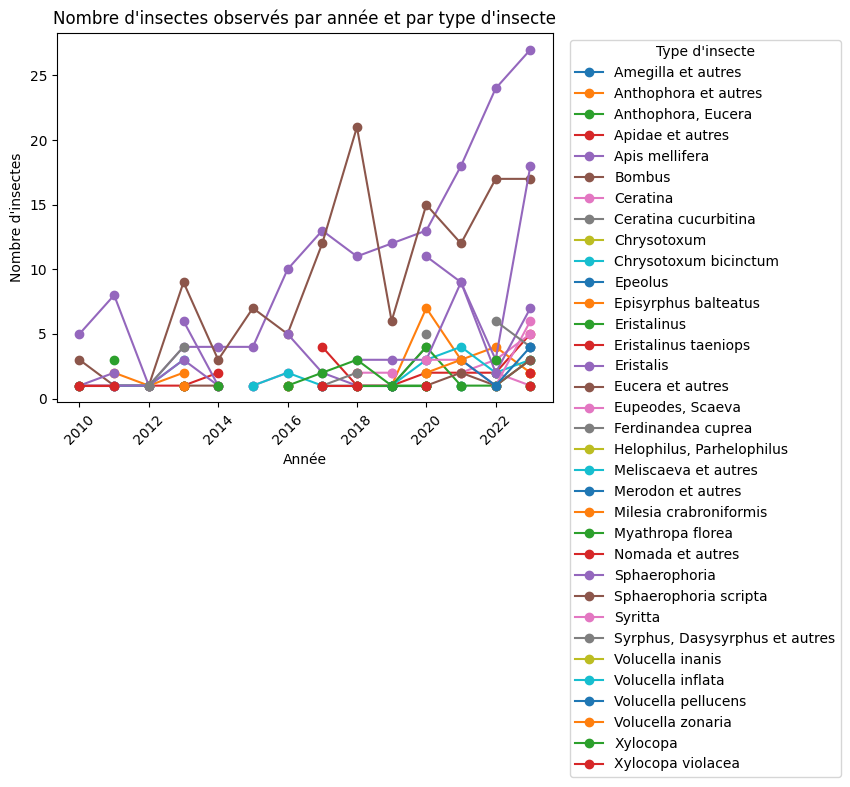

In [67]:
import matplotlib.pyplot as plt


# Grouper le DataFrame filtré par année et type d'insecte, et compter le nombre d'observations pour chaque groupe
observations_par_annee_insecte = drome2.groupby(['annee_collection', 'insecte_sc']).size()

# Réorganiser les données pour les tracer
observations_par_annee_insecte = observations_par_annee_insecte.unstack(level='insecte_sc')

# Tracer les courbes pour chaque type d'insecte
plt.figure(figsize=(10, 6))
observations_par_annee_insecte.plot(kind='line', marker='o')
plt.title('Nombre d\'insectes observés par année et par type d\'insecte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'insectes')
plt.xticks(rotation=45)
# Placer la légende en dehors du graphique
plt.legend(title='Type d\'insecte', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


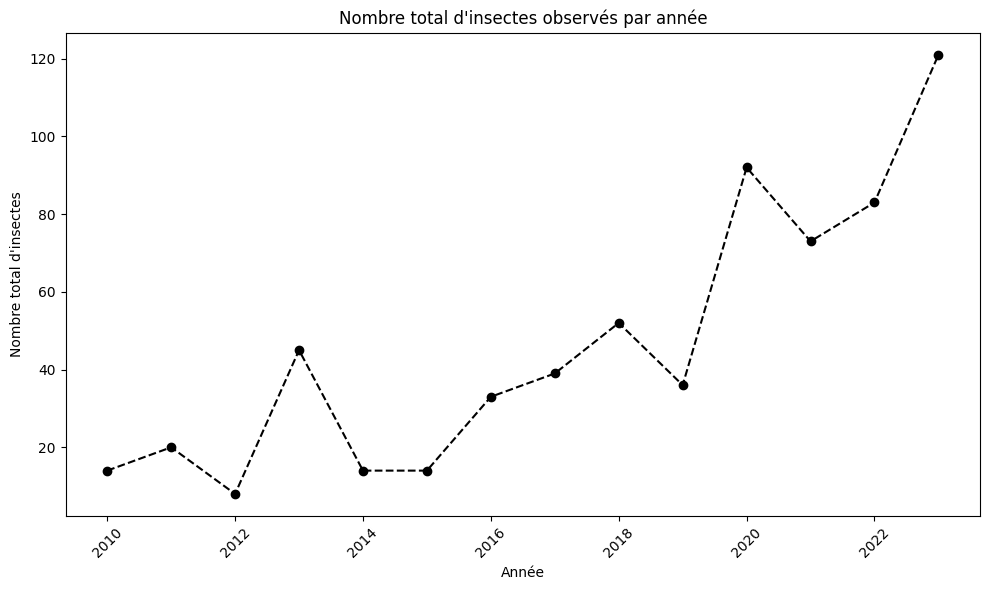

In [68]:
# Créer un second graphique pour le nombre total d'observations par année
plt.figure(figsize=(10, 6))
observations_totales_par_annee = drome2.groupby('annee_collection').size()
observations_totales_par_annee.plot(kind='line', marker='o', color='black', linestyle='--')
plt.title('Nombre total d\'insectes observés par année')
plt.xlabel('Année')
plt.ylabel('Nombre total d\'insectes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pas assez d'observations dans la Drôme pour expliquer la persistance du cluster au fil des années près de Valence. On vérifie donc l'Ardèche.


# Filtrage du dataset - Ardèche (07)

In [16]:
verif.columns

Index(['insecte_ordre', 'insecte_super_famille', 'insecte_famille',
       'insecte_sous_famille', 'insecte_genre', 'insecte_espece', 'insecte_sc',
       'insecte_fr', 'longitude', 'latitude', 'annee_collection',
       'departement'],
      dtype='object')

In [70]:
departement = '07'
insectes = ['Apidae', 'Syrphidae']

In [71]:
ardeche = verif.where((verif['departement']==departement)).dropna(subset='departement')

In [72]:
ardeche['insecte_sc'].value_counts()

Apis mellifera                   149
Osmia cornuta et autres          108
Bombus                            96
Neomyia, Calliphora et autres     94
Andrenidae                        91
                                ... 
Halictidae                         1
Lycaena phlaeas                    1
Stelis, Heriades                   1
Chrysididae                        1
Lycaena tityrus                    1
Name: insecte_sc, Length: 179, dtype: int64

En Ile-et-Vilaine, il y a plus d'observations d'Eristales que d'observations d'abeilles mellifères. Le bourdon prédomine. 

In [73]:
ardeche['insecte_famille'].value_counts()

Apidae             315
Syrphidae          208
Andrenidae         195
Megachilidae       118
Calliphoridae       94
                  ... 
Meloidae             1
Crambidae            1
Pyrochroidae         1
Colletidae           1
Stenocephalidae      1
Name: insecte_famille, Length: 70, dtype: int64

Dans le 57, les insectes majoritaires observés sont bien ceux appartenant aux deux familles des Apidae et Syrphidae. 

In [74]:
# On filtre à partir de ces deux familles d'insectes
ardeche2 = verif.where((verif['departement']==departement)  & (verif['insecte_famille'].isin(insectes))).dropna(subset=['departement', 'insecte_famille'])

In [77]:
ardeche2['annee_collection'].value_counts()

2021.0    401
2020.0    122
Name: annee_collection, dtype: int64

<Figure size 1000x600 with 0 Axes>

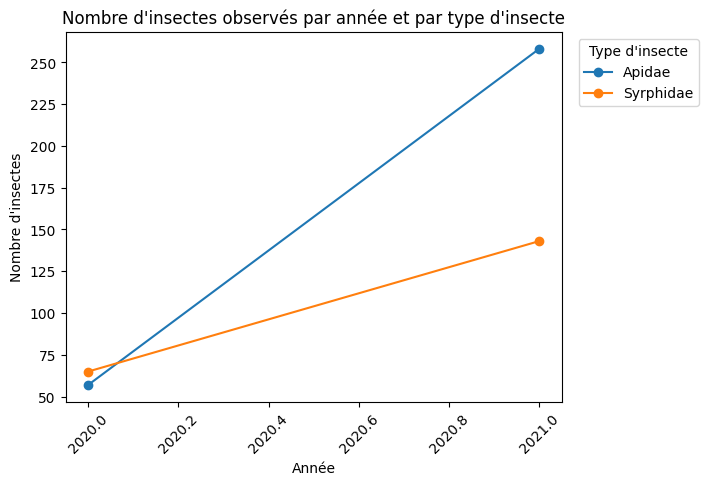

In [76]:
import matplotlib.pyplot as plt


# Grouper le DataFrame filtré par année et type d'insecte, et compter le nombre d'observations pour chaque groupe
observations_par_annee_insecte = ardeche2.groupby(['annee_collection', 'insecte_famille']).size()

# Réorganiser les données pour les tracer
observations_par_annee_insecte = observations_par_annee_insecte.unstack(level='insecte_famille')

# Tracer les courbes pour chaque type d'insecte
plt.figure(figsize=(10, 6))
observations_par_annee_insecte.plot(kind='line', marker='o')
plt.title('Nombre d\'insectes observés par année et par type d\'insecte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'insectes')
plt.xticks(rotation=45)
# Placer la légende en dehors du graphique
plt.legend(title='Type d\'insecte', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


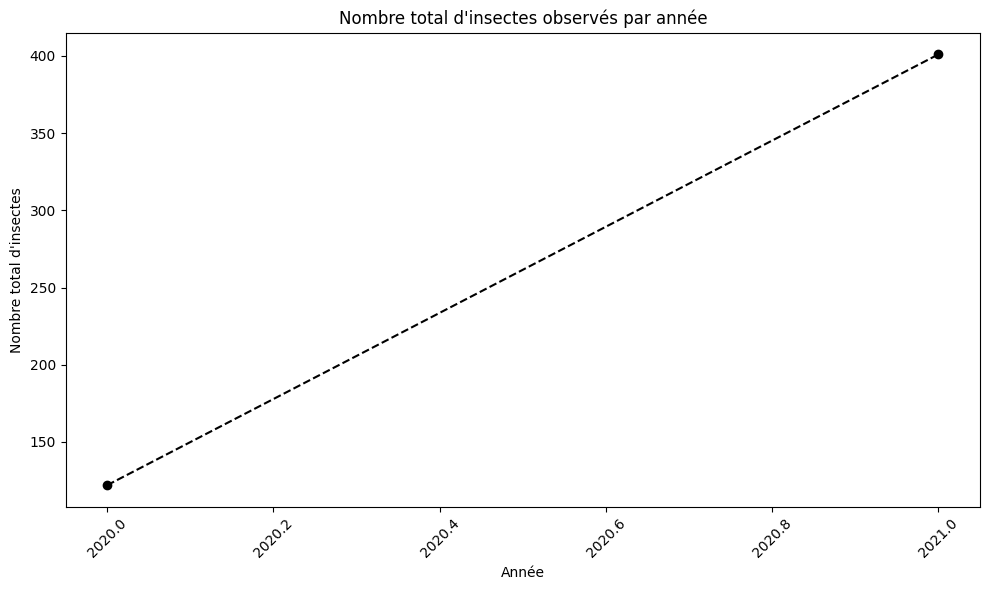

In [78]:
# Créer un second graphique pour le nombre total d'observations par année
plt.figure(figsize=(10, 6))
observations_totales_par_annee = ardeche2.groupby('annee_collection').size()
observations_totales_par_annee.plot(kind='line', marker='o', color='black', linestyle='--')
plt.title('Nombre total d\'insectes observés par année')
plt.xlabel('Année')
plt.ylabel('Nombre total d\'insectes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Ardèche + Drôme

In [16]:
verif.columns

Index(['insecte_ordre', 'insecte_super_famille', 'insecte_famille',
       'insecte_sous_famille', 'insecte_genre', 'insecte_espece', 'insecte_sc',
       'insecte_fr', 'longitude', 'latitude', 'annee_collection',
       'departement'],
      dtype='object')

In [79]:
departement = ['26', '07']
insectes = ['Apidae', 'Syrphidae']

In [80]:
ard_dro = verif.where((verif['departement'].isin(departement))).dropna(subset='departement')

In [81]:
ard_dro['insecte_sc'].value_counts()

Apis mellifera                      303
Bombus                              225
Halictus, Lasioglossum et autres    163
Neomyia, Calliphora et autres       139
Osmia cornuta et autres             121
                                   ... 
Ebrechtella tricuspidata              1
Coenonympha dorus                     1
Euphydryas aurinia                    1
Colpa sexmaculata                     1
Sesiidae                              1
Name: insecte_sc, Length: 313, dtype: int64

En Ile-et-Vilaine, il y a plus d'observations d'Eristales que d'observations d'abeilles mellifères. Le bourdon prédomine. 

In [82]:
ard_dro['insecte_famille'].value_counts()

Apidae          673
Syrphidae       494
Andrenidae      248
Halictidae      237
Nymphalidae     198
               ... 
Asilidae          1
Phalangiidae      1
Ulidiidae         1
Lycidae           1
Sesiidae          1
Name: insecte_famille, Length: 100, dtype: int64

Les insectes majoritaires observés sont bien ceux appartenant aux deux familles des Apidae et Syrphidae. 

In [85]:
# On filtre à partir de ces deux familles d'insectes
ard_dro2 = verif.where((verif['departement'].isin(departement))  & (verif['insecte_famille'].isin(insectes))).dropna(subset=['departement', 'insecte_famille'])

In [86]:
ard_dro2.head()

,insecte_ordre,insecte_super_famille,insecte_famille,insecte_sous_famille,insecte_genre,insecte_espece,insecte_sc,insecte_fr,longitude,latitude,annee_collection,departement
7576,Hymenoptera,Apoidea,Apidae,Apinae,Apis,Apis mellifera,Apis mellifera,L'Abeille mellifère,44.419208,4.908356,2019.0,26
10201,Diptera,Syrphoidea,Syrphidae,Syrphinae,Sphaerophoria,NaN,Sphaerophoria,Les Syrphes Sphaerophoria (femelle),44.533019,4.736492,2019.0,26
10202,Diptera,Syrphoidea,Syrphidae,Syrphinae,Scaeva,NaN,"Eupeodes, Scaeva",Les Syrphes à taches en virgules,44.533019,4.736492,2019.0,26
10228,Hymenoptera,Apoidea,Apidae,Apinae,Apis,Apis mellifera,Apis mellifera,L'Abeille mellifère,44.533156,4.736164,2019.0,26
10244,Hymenoptera,Apoidea,Apidae,Apinae,Apis,Apis mellifera,Apis mellifera,L'Abeille mellifère,44.525767,4.744772,2019.0,26


<Figure size 1000x600 with 0 Axes>

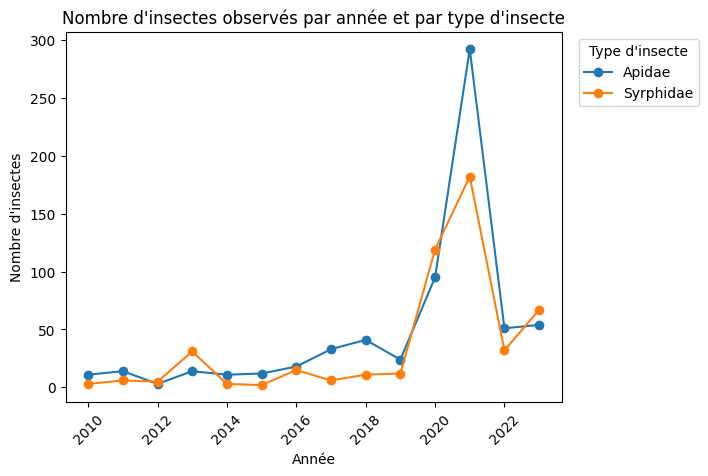

In [87]:
import matplotlib.pyplot as plt


# Grouper le DataFrame filtré par année et type d'insecte, et compter le nombre d'observations pour chaque groupe
observations_par_annee_insecte = ard_dro2.groupby(['annee_collection', 'insecte_famille']).size()

# Réorganiser les données pour les tracer
observations_par_annee_insecte = observations_par_annee_insecte.unstack(level='insecte_famille')

# Tracer les courbes pour chaque type d'insecte
plt.figure(figsize=(10, 6))
observations_par_annee_insecte.plot(kind='line', marker='o')
plt.title('Nombre d\'insectes observés par année et par type d\'insecte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'insectes')
plt.xticks(rotation=45)
# Placer la légende en dehors du graphique
plt.legend(title='Type d\'insecte', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

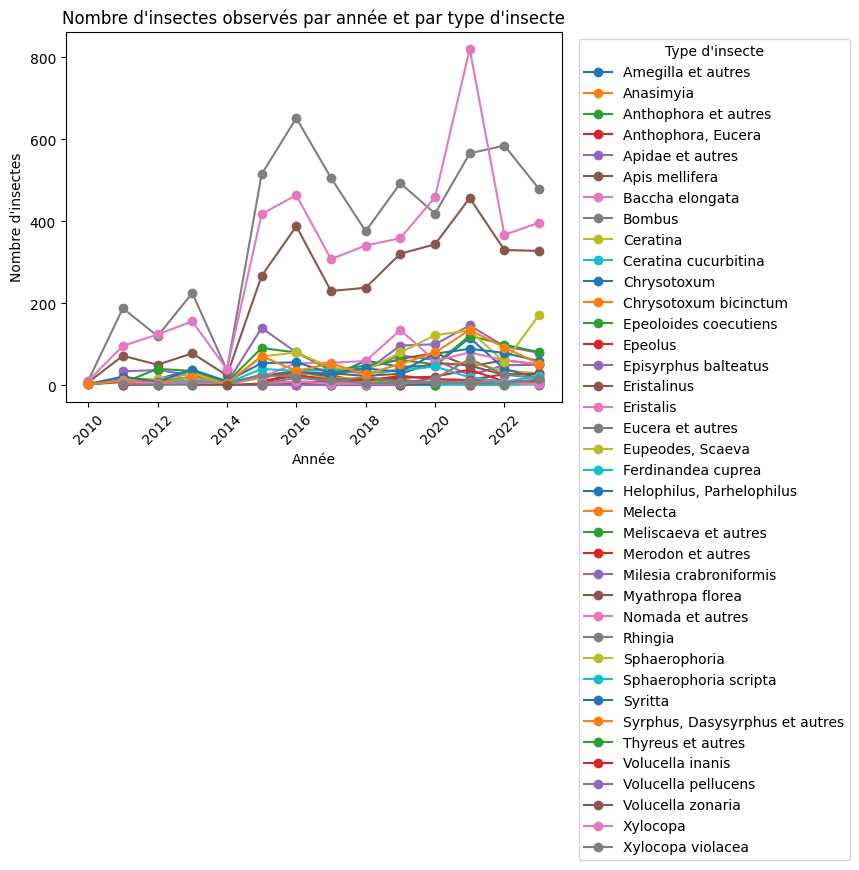

In [55]:
import matplotlib.pyplot as plt


# Grouper le DataFrame filtré par année et type d'insecte, et compter le nombre d'observations pour chaque groupe
observations_par_annee_insecte = rennes2.groupby(['annee_collection', 'insecte_sc']).size()

# Réorganiser les données pour les tracer
observations_par_annee_insecte = observations_par_annee_insecte.unstack(level='insecte_sc')

# Tracer les courbes pour chaque type d'insecte
plt.figure(figsize=(10, 6))
observations_par_annee_insecte.plot(kind='line', marker='o')
plt.title('Nombre d\'insectes observés par année et par type d\'insecte')
plt.xlabel('Année')
plt.ylabel('Nombre d\'insectes')
plt.xticks(rotation=45)
# Placer la légende en dehors du graphique
plt.legend(title='Type d\'insecte', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


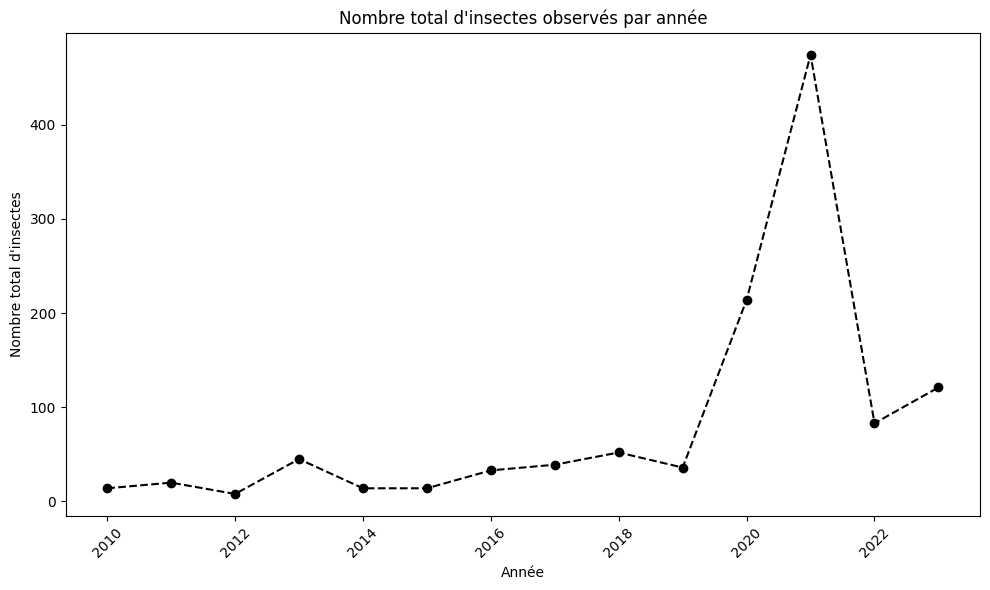

In [88]:
# Créer un second graphique pour le nombre total d'observations par année
plt.figure(figsize=(10, 6))
observations_totales_par_annee = ard_dro2.groupby('annee_collection').size()
observations_totales_par_annee.plot(kind='line', marker='o', color='black', linestyle='--')
plt.title('Nombre total d\'insectes observés par année')
plt.xlabel('Année')
plt.ylabel('Nombre total d\'insectes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ce nombre d'observations nous invite à nous demander s'il n'y a pas plus d'observaitons en ile-et-vilaine que dans la Nièvre de manière générale. 
